In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def euler(f, x0, y0, h, n):
    """
    y_k ~ y(x_k)
    """
    x = [x0 + i * h for i in range(n + 1)]
    y = [y0]
    for k in range(n):
        yk = y[k] + f(x[k], y[k]) * h
        y.append(yk)
    return x, y

def euler_mid(f, x0, y0, h, n):
    x = [x0 + i * h for i in range(n + 1)]
    y = [y0]
    for k in range(n):
        m1 = f(x[k], y[k]) 
        m2 = f(x[k] + h / 2, y[k] + m1 * h / 2)
        yk = y[k] + m2 * h
        y.append(yk)
    return x, y

def heun(f, x0, y0, h, n):
    x = [x0 + i * h for i in range(n + 1)]
    y = [y0]
    for k in range(n):
        m1 = f(x[k], y[k])
        m2 = f(x[k] + h, y[k] + m1 * h)
        yk = y[k] + (m1 + m2) * h / 2
        y.append(yk)
    return x, y

def ralston(f, x0, y0, h, n):
    x = [x0 + i * h for i in range(n + 1)]
    y = [y0]
    for k in range(n):
        m1 = f(x[k], y[k])
        m2 = f(x[k] + (3/4) * h, y[k] + m1 * (3/4) * h)
        yk = y[k] + (m1 + 2 * m2) * h / 3
        y.append(yk)
    return x, y

def RK2(c, f, x0, y0, h, n):
    x = [x0 + i * h for i in range(n + 1)]
    y = [y0]
    for k in range(n):
        ???
    return x, y

def RK3(f, x0, y0, h, n):
    x = [x0 + i * h for i in range(n + 1)]
    y = [y0]
    for k in range(n):
        m1 = f(x[k], y[k])
        m2 = f(x[k] + h / 2, y[k] + m1 * h / 2)
        m3 = f(x[k] + h, y[k] + (2 * m2 - m1) * h)
        yk = y[k] + (m1 + 4 * m2 + m3) * h / 6
        y.append(yk)
    return x, y

def RK4(f, x0, y0, h, n):
    x = [x0 + i * h for i in range(n + 1)]
    y = [y0]
    for k in range(n):
        m1 = f(x[k], y[k])
        m2 = f(x[k] + h / 2, y[k] + m1 * h / 2)
        m3 = f(x[k] + h / 2, y[k] + m2 * h / 2)
        m4 = f(x[k] + h, y[k] + m3 * h)
        yk = y[k] + (m1 + 2 * m2 + 2 * m3 + m4) * h / 6
        y.append(yk)
    return x, y

81.64204943055556
2.1977231334603307


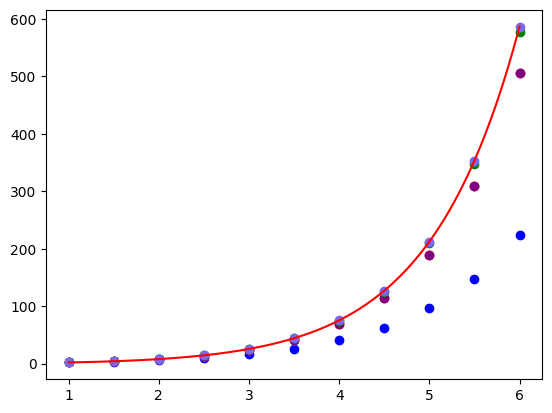

In [53]:
# exemplo 1
# y'=y+x, y(1)=2 => x0 = 1, y0 = 2
# solução algébrica: y(x) = -x + 4 e^(x - 1) - 1

def f(x, y):
    return y + x
x0 = 1
y0 = 2
h = 0.5
n = 10
x, y = euler(f, x0, y0, h, n)
x_mid, y_mid = euler_mid(f, x0, y0, h, n)
x_h, y_h = heun(f, x0, y0, h, n)
x_r, y_r = ralston(f, x0, y0, h, n)
x_rk3, y_rk3 = RK3(f, x0, y0, h, n)
x_rk4, y_rk4 = RK4(f, x0, y0, h, n)
#print(x)
#print(y)
#print(x_mid)
#print(y_mid)

diff = sum(abs(a - b) for a, b in zip(y, y_rk4)) / n
print(diff)

# plotar o gráfico da solução algébrica
def sol(x):
    return -x + 4 * np.exp(x - 1) - 1

partition = [x0 + i * h for i in range(n + 1)]
sol_exact = [sol(xi) for xi in partition]
diff_exact = sum(abs(a - b) for a, b in zip(y_rk4, sol_exact))
print(diff_exact)

t = np.linspace(x0, x0 + n * h, 200)
st = [sol(ti) for ti in t]
plt.plot(t, st, color="red")
plt.scatter(x, y, color="blue")
plt.scatter(x_mid, y_mid, color="magenta")
plt.scatter(x_h, y_h, color="orange")
plt.scatter(x_r, y_r, color="purple")
plt.scatter(x_rk3, y_rk3, color="green")
plt.scatter(x_rk4, y_rk4, color="mediumslateblue")


0.005496393862143751


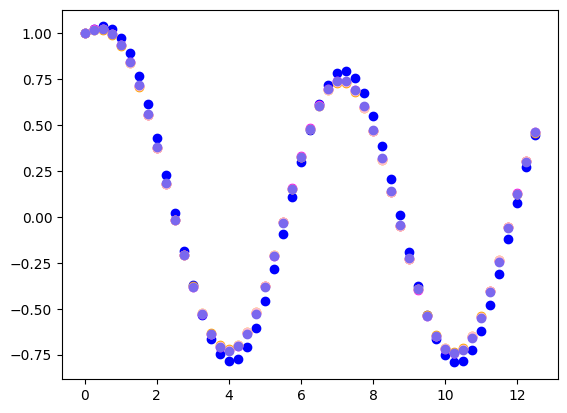

In [60]:
# exemplo 2
# y'=y^2+y+x, y(0)=1
def f(x, y):
    return -y + y / 10 + np.cos(x)
x0 = 0
y0 = 1
h = 0.25
n = 50

x, y = euler(f, x0, y0, h, n)
x_mid, y_mid = euler_mid(f, x0, y0, h, n)
x_h, y_h = heun(f, x0, y0, h, n)
x_r, y_r = ralston(f, x0, y0, h, n)
x_rk3, y_rk3 = RK4(f, x0, y0, h, n)
x_rk4, y_rk4 = RK4(f, x0, y0, h, n)

diff = sum(abs(a - b) for a, b in zip(y_h, y_rk4)) / n
print(diff)

plt.scatter(x, y, color="blue")
plt.scatter(x_mid, y_mid, color="magenta")
plt.scatter(x_h, y_h, color="orange")
plt.scatter(x_r, y_r, color="pink")
plt.scatter(x_rk4, y_rk4, color="mediumslateblue")

In [72]:
k = 0.04634
nu = 61670
def f(t, P):
    return k * P + nu
t0 = 0
P0 = 1227146
h = 0.0625
n = int((1 - 0) / h)
print(n)
x, y = euler_mid(f, t0, P0, h, n)
print(y[-1])

16
1348471.1702982045


In [73]:
a = 9.35463
def f(x, y):
    return -y / np.sqrt(a**2 - y**2)
x0 = 1.60744
y0 = 5.91317
h = 0.20065
n = 100

x, y = heun(f, x0, y0, h, n)
print(y[1:])

[5.7531610939726985, 5.6000056702902965, 5.453113321304258, 5.311980926071465, 5.176174915483475, 5.045317981295324, 4.91907892927344, 4.797164805556884, 4.67931469822981, 4.565294794516508, 4.454894393474318, 4.347922655776975, 4.244205929159169, 4.143585528514822, 4.045915878771337, 3.9510629499569276, 3.858902929650624, 3.769321089828494, 3.682210814082354, 3.5974727580514974, 3.5150141212153763, 3.434748012335456, 3.3565928940911816, 3.2804720950365858, 3.206313379065468, 3.1340485642302993, 3.0636131841009466, 2.994946185940895, 2.927989660872308, 2.862688601936931, 2.798990686568466, 2.7368460804981156, 2.676207260537641, 2.6170288540389017, 2.559267493127562, 2.5028816820613375, 2.4478316762776884, 2.394079371878681, 2.3415882044570804, 2.29032305630186, 2.240250171136765, 2.1913370756452455, 2.1435525071213894, 2.0968663466614257, 2.0512495573756406, 2.0066741271575186, 1.9631130155967886, 1.920540104666801, 1.8789301528551356, 1.8382587524402538, 1.7985022896469531, 1.75963790

In [74]:
def A(t):
    return np.exp(-0.0514 * np.pi * t)

def B(t):
    return np.sin(2 * t - np.pi)

def E(t):
    return A(t) * B(t)

def dE(t):
    return A(t) * (-0.0514 * np.pi) * B(t) + np.cos(2 * t - np.pi) * 2 * A(t)

def ddE(t):
    left = A(t) * (-0.0514 * np.pi)**2 * B(t) + np.cos(2 * t - np.pi) * 2 * A(t) * (-0.0514 * np.pi)
    right = -np.sin(2 * t - np.pi) * 4 * A(t) + np.cos(2 * t - np.pi) * 2 * A(t) * (-0.0514 * np.pi)
    return left + right

C = 0.3186
R = 1.1156
L = 1.6319

def f(t, i):
    return C * ddE(t) + (1 / R) * dE(t) + (1 / L) * E(t)

t0 = 0
i0 = 0
h = 0.1498
n = 150
x, y = heun(f, t0, i0, h, n)
print(y[1:])

[-0.21249897644594998, -0.3675351094803875, -0.45425146948637124, -0.4682840853113061, -0.41183729059903446, -0.29318057005347264, -0.1256382689715635, 0.07381544984007177, 0.2862147714573616, 0.4923564185420881, 0.6744917813803976, 0.817811802390104, 0.9116044267145302, 0.9499987678622539, 0.9322503678148845, 0.862564254811118, 0.7494931155463855, 0.604983327560511, 0.4431689857699235, 0.27903138681996426, 0.1270476643017575, -5.2624138691975686e-05, -0.09231921673098613, -0.1433208629418627, -0.15054207550666815, -0.11541838752514061, -0.04302410085095586, 0.05854373013834871, 0.17901681186588653, 0.30695696482609697, 0.43081258909710146, 0.5399351639856064, 0.6254686922859956, 0.6810402341311991, 0.7032004800934255, 0.6915876039033452, 0.6488131210292147, 0.5800928731004846, 0.49266747610080686, 0.39507290511287757, 0.29633214095161164, 0.20514236408859446, 0.12912905329442498, 0.07422912006404894, 0.04425098076154308, 0.040641718306065944, 0.06247193412208608, 0.10662933541099431, 